In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import sweetviz as sv
import seaborn as sns
import numpy as np
from datetime import datetime
#!pip install seaborn

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
num = pd.read_excel("final_corona_data_fixed.xlsx", sheet_name= "daily")#데이터부르기 : 확진자 및 사망자
query = pd.read_excel("naver_corona_fixed.xlsx")

In [3]:
num.head(5)

,기준일,사망자,확진자,일일확진자,일일사망자
0,2020-09-15,367,22391,106,4
1,2020-09-14,363,22285,109,5
2,2020-09-13,358,22176,121,3
3,2020-09-12,355,22055,136,5
4,2020-09-11,350,21919,176,4


In [4]:
query.head(5)

,날짜,마스크,날짜.1,코로나,날짜.2,확진자,날짜.3,사망자
0,2020-02-02,8.60600,2020-02-02,3.34922,2020-02-02,1.67050,2020-02-02,0.03803
1,2020-02-03,9.81064,2020-02-03,4.34857,2020-02-03,2.16652,2020-02-03,0.04129
2,2020-02-04,7.58866,2020-02-04,4.14043,2020-02-04,1.31176,2020-02-04,0.03232
3,2020-02-05,7.94393,2020-02-05,3.76198,2020-02-05,1.54377,2020-02-05,0.02977
4,2020-02-06,7.99163,2020-02-06,4.73247,2020-02-06,2.45594,2020-02-06,0.03607


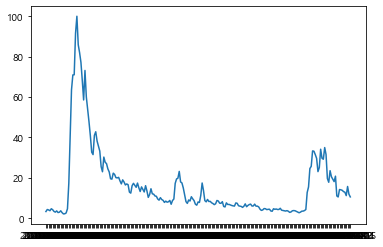

In [5]:
pd.to_datetime(query["날짜.1"])
plt.plot(query["날짜.1"],query["코로나"]) #코로나 검색량

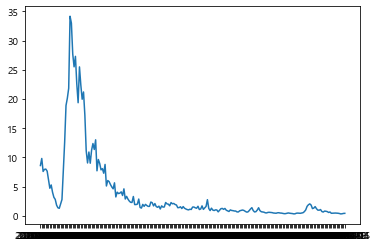

In [6]:
plt.plot(query["날짜.1"],query["마스크"]) #마스크 검색량

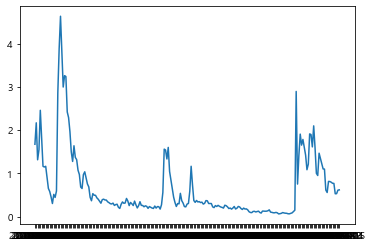

In [7]:
plt.plot(query["날짜.1"],query["확진자"])

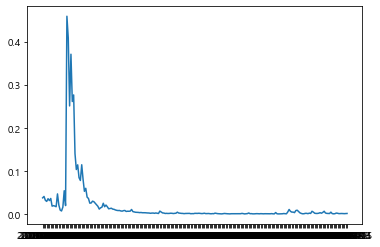

In [8]:
plt.plot(query["날짜.1"],query["사망자"])

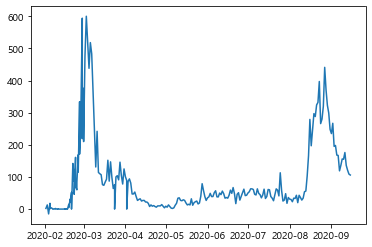

In [9]:
plt.plot(num["기준일"],num["일일확진자"]) #일일 확진자


C:\ProgramData\Anaconda3\envs\sba\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\sba\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


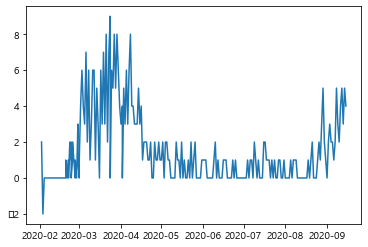

In [10]:
plt.plot(num["기준일"],num["일일사망자"])

In [11]:
# 확진자 지수 만들기
FI = pd.DataFrame()
FI["기준일"] = num["기준일"]
FI["RCI"] = 0

for i in range (len(num["확진자"])-14):
    t_case = (num["확진자"].iloc[i] / (num["확진자"].iloc[i] + num["확진자"].iloc[i+14]))*100
    FI["RCI"].iloc[i] = t_case

    
FI.head(5)
    

C:\ProgramData\Anaconda3\envs\sba\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,기준일,RCI
0,2020-09-15,52.594367
1,2020-09-14,52.768043
2,2020-09-13,52.957612
3,2020-09-12,53.202268
4,2020-09-11,53.466192


In [12]:
# 사망자 지수 만들기

FI["RDI"] = 0

for i in range (len(num["사망자"])-14):
    t_death = (num["사망자"].iloc[i] / (num["사망자"].iloc[i] + num["사망자"].iloc[i+14]))*100
    FI["RDI"].iloc[i] = t_death
    
FI.tail(40) #####사망자 끝에 0값때문에 이렇게 됨 고쳐야하는가? 수정필요할듯 선생님께 문의해보자.
    

C:\ProgramData\Anaconda3\envs\sba\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\envs\sba\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in longlong_scalars
  


,기준일,RCI,RDI
219,2020-02-21,87.931034,100.0
220,2020-02-21,84.782609,100.0
221,2020-02-20,78.787879,100.0
222,2020-02-20,74.545455,NaN
223,2020-02-19,64.556962,NaN
224,2020-02-19,62.162162,NaN
225,2020-02-18,52.542373,NaN
226,2020-02-18,52.542373,NaN
227,2020-02-18,52.542373,NaN
228,2020-02-17,52.631579,NaN


In [13]:
# 공포지수만들기
FI["KFI"] = 0
# 지금까지 총합
for i in range (len(num["사망자"])-14):
    F_index = (FI["RCI"].iloc[i] + FI["RDI"].iloc[i])*0.5
    FI["KFI"].iloc[i] = F_index
    
FI.tail(40) 


C:\ProgramData\Anaconda3\envs\sba\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,기준일,RCI,RDI,KFI
219,2020-02-21,87.931034,100.0,93.965517
220,2020-02-21,84.782609,100.0,92.391304
221,2020-02-20,78.787879,100.0,89.393939
222,2020-02-20,74.545455,NaN,NaN
223,2020-02-19,64.556962,NaN,NaN
224,2020-02-19,62.162162,NaN,NaN
225,2020-02-18,52.542373,NaN,NaN
226,2020-02-18,52.542373,NaN,NaN
227,2020-02-18,52.542373,NaN,NaN
228,2020-02-17,52.631579,NaN,NaN


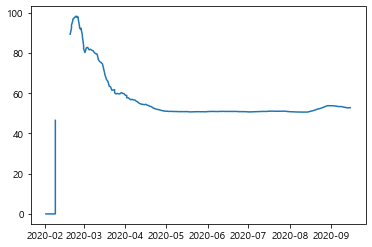

In [14]:
plt.plot(FI["기준일"],FI["KFI"])


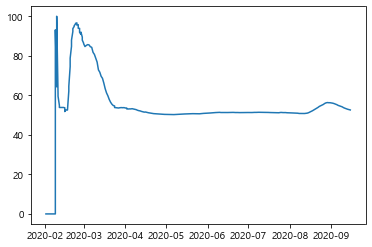

In [15]:
plt.plot(FI["기준일"],FI["RCI"])

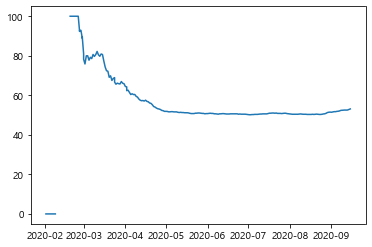

In [16]:
plt.plot(FI["기준일"],FI["RDI"])

In [17]:
#주가정보도 api로받아서 비교
kospi = pd.read_excel("코스피월별지수.xlsx")
kospi.head(5)


,기준일,Unnamed: 1
0,2020-02-29,1987.01
1,2020-03-31,1754.64
2,2020-04-30,1947.56
3,2020-05-31,2029.60
4,2020-06-30,2108.33


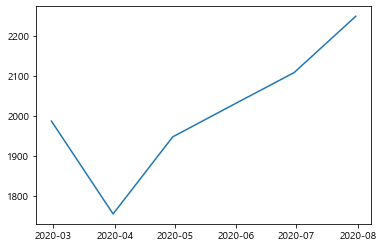

In [18]:
plt.plot(kospi["기준일"],kospi["Unnamed: 1"])

In [19]:
kospi1 = pd.read_excel("일별주식시장시가총액.xlsx")



kospi1.head(5)
#kospi.count()
# kospi1["6.1.1주식시장(일별)"] = kospi1["total_price"]

,통계표,6.1.1 주식시장(일별)
0,항목명1,"시가총액(주식시장, 잠정치)"
1,단위,억원
2,변환,원자료
3,2020/02/01,NaN
4,2020/02/02,NaN


In [20]:
#pd.to_datetime(kospi1["통계표"])
kospi1_drop = kospi1.dropna(axis=0)
kospi1_drop = kospi1.drop(kospi1.index[[0,1,2]])
kospi1_drop.head(5)

,통계표,6.1.1 주식시장(일별)
3,2020/02/01,NaN
4,2020/02/02,NaN
5,2020/02/03,14271330
6,2020/02/04,14542350
7,2020/02/05,14602440


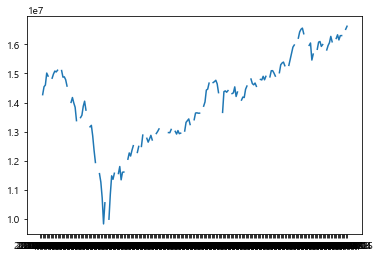

In [21]:
plt.plot(kospi1_drop["통계표"],kospi1_drop["6.1.1 주식시장(일별)"])

In [22]:
# report1 = sv.analyze(num)
# report2 = sv.analyze(FI)
# report3 = sv.analyze(FI)
# report1.show_html("C:/SBA/report1.html")
# report2.show_html("C:/SBA/report2.html")
# report3.show_html("C:/SBA/report3.html")

In [29]:
#월별코로나 확진자
#월별 코로나지수 m.corona(fixed된 내용월별처리.)
#월별 쿼리검색수 
m_corona = pd.read_excel("m_corona.xlsx")
price1 = pd.read_excel("생활물가지수1.xlsx")
price1.head(5)

,period,total,life,food,nonfood,house,nolife,life_house
0,2020-02-29,105.80,106.39,110.60,104.16,104.06,105.34,106.04
1,2020-03-31,105.54,106.31,111.39,103.59,104.08,104.77,105.97
2,2020-04-30,104.95,105.11,111.00,101.97,104.11,104.89,104.96
3,2020-05-31,104.71,104.55,111.34,100.94,104.14,105.05,104.49
4,2020-06-30,104.87,104.88,111.33,101.45,104.17,104.98,104.77


In [30]:
m_corona.head(5)
pd.to_datetime(m_corona["date"])
pp_data1  = pd.concat([m_corona, price1], axis = 1)

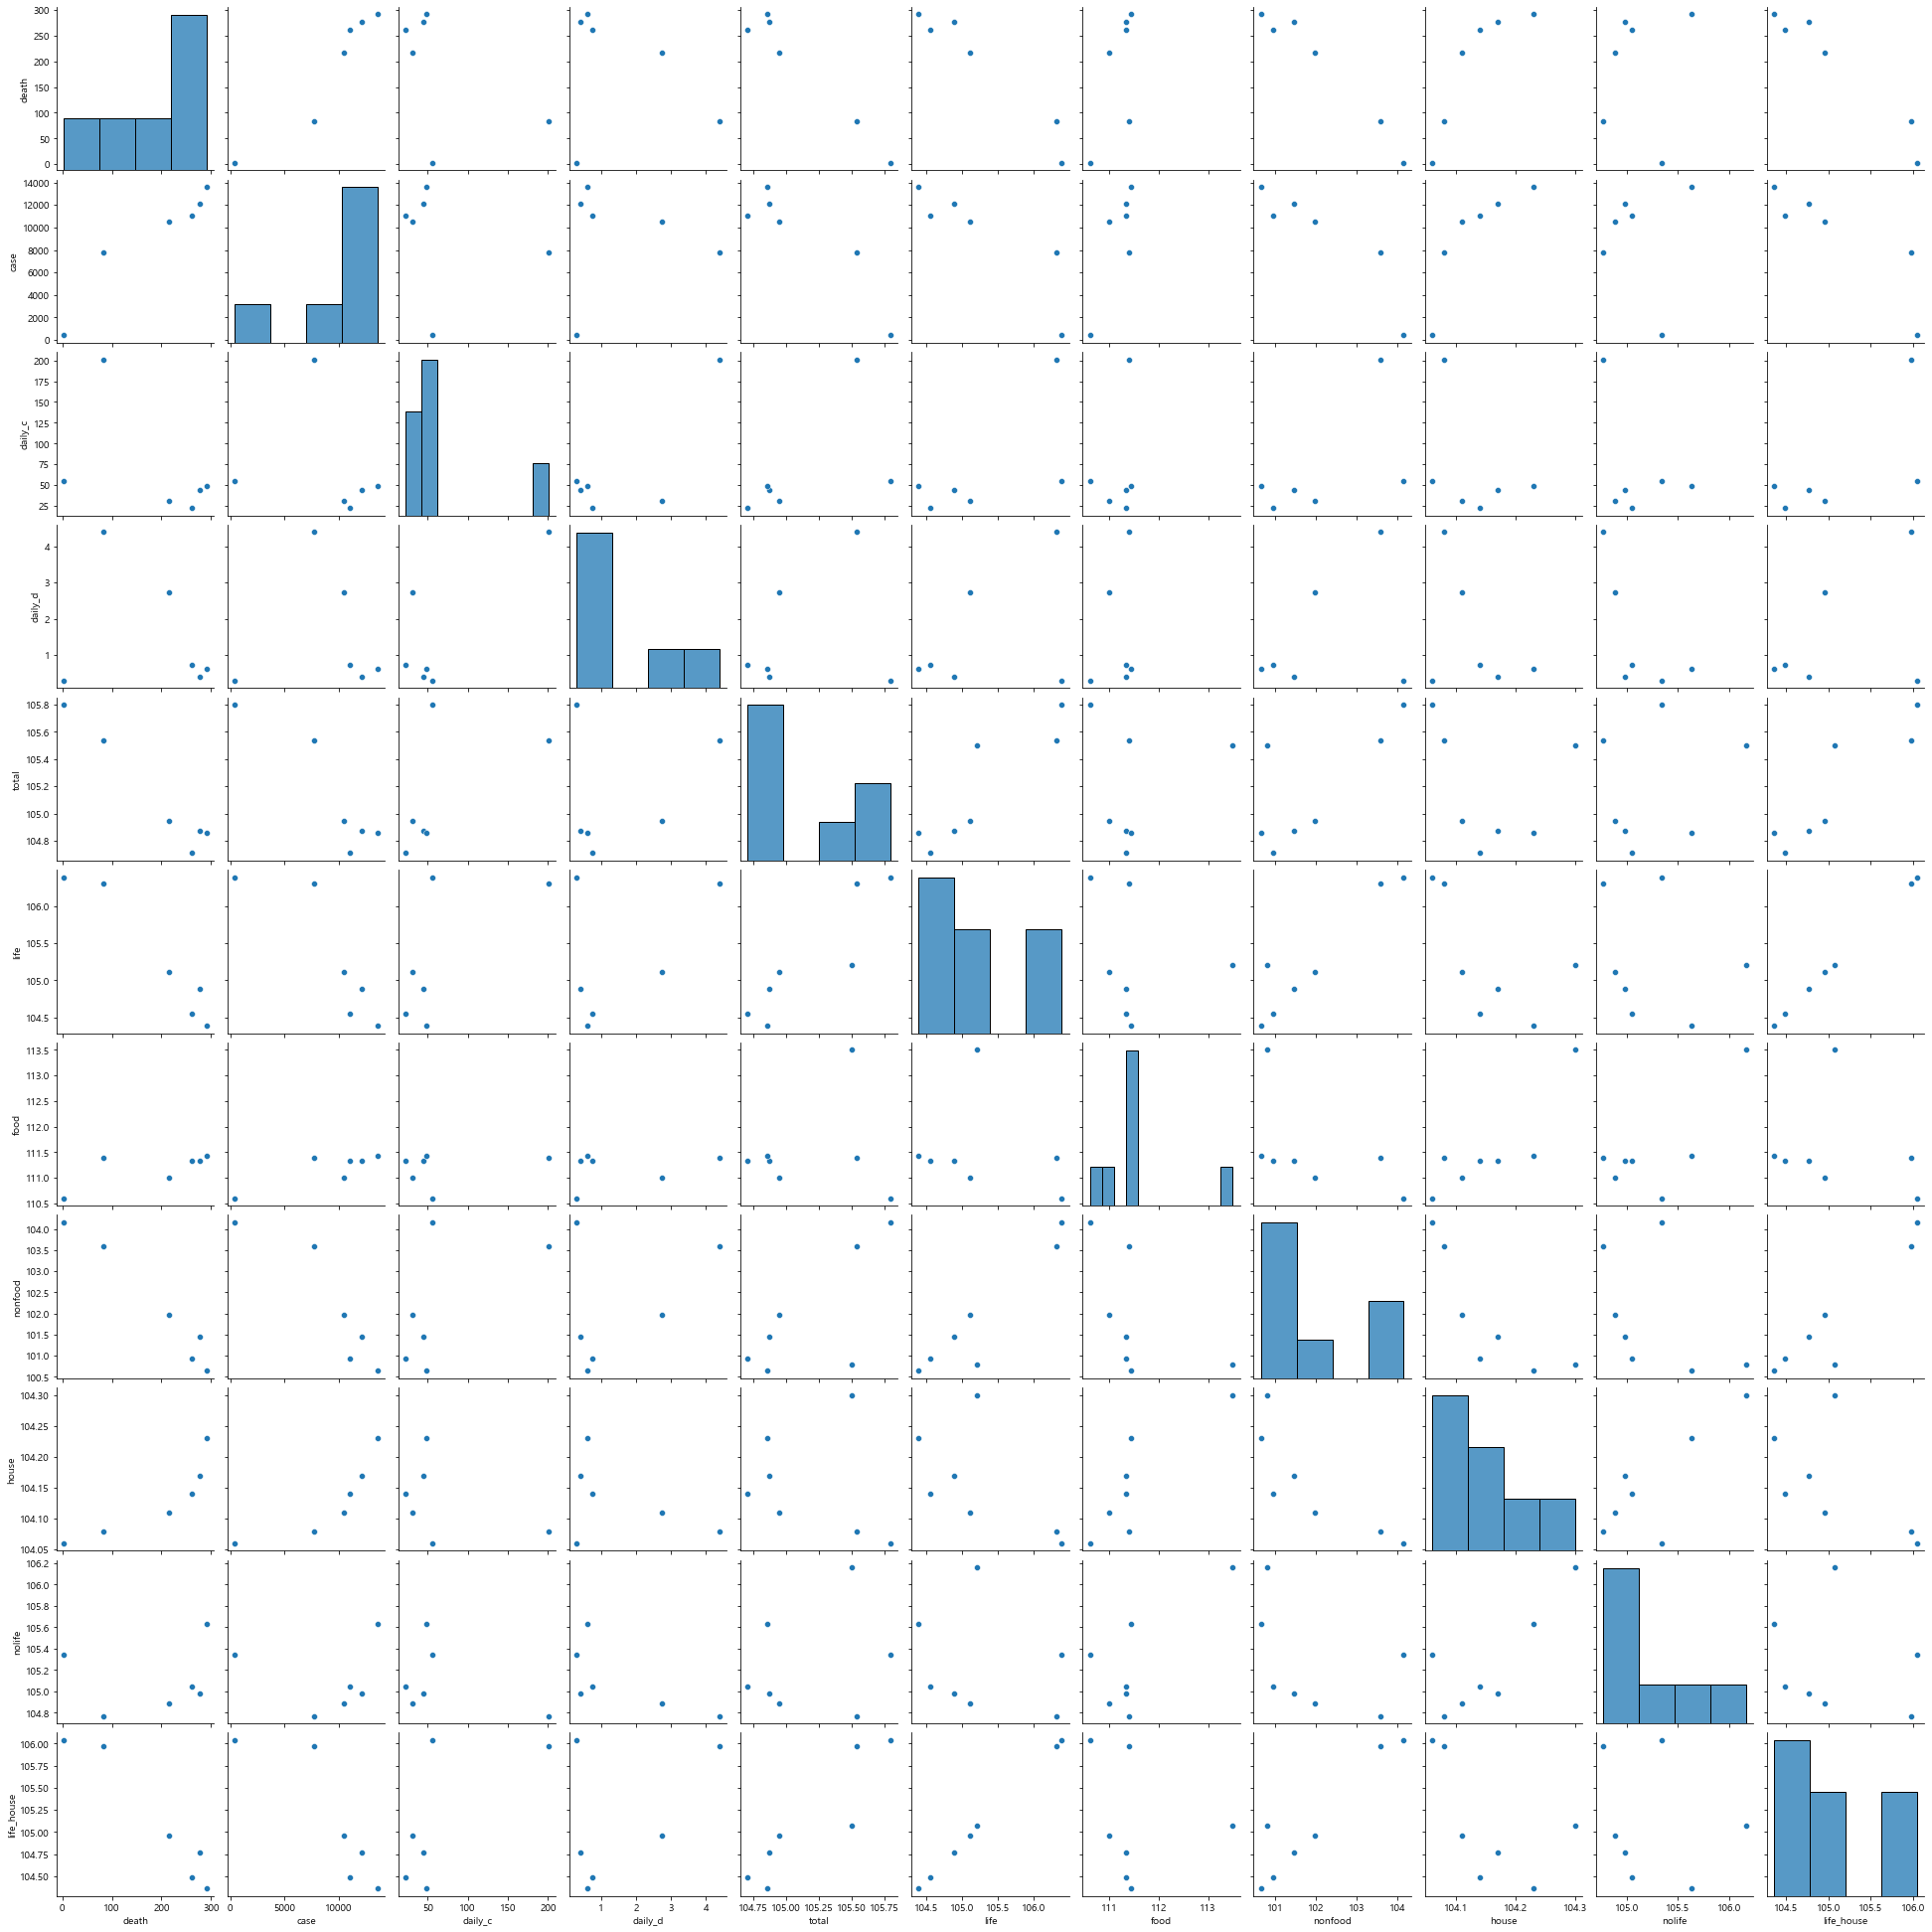

In [31]:
n_price1 = sns.pairplot(pp_data1)
#데이타통쨰로 넣으면 양적인건만 분석해줌.


In [32]:
price2 = pd.read_excel("상품군별판매액지수1.xlsx")
price2.head(5)
pd.to_datetime(price2["period"])
pp_data2 = pd.concat([m_corona,price2],axis= 1)



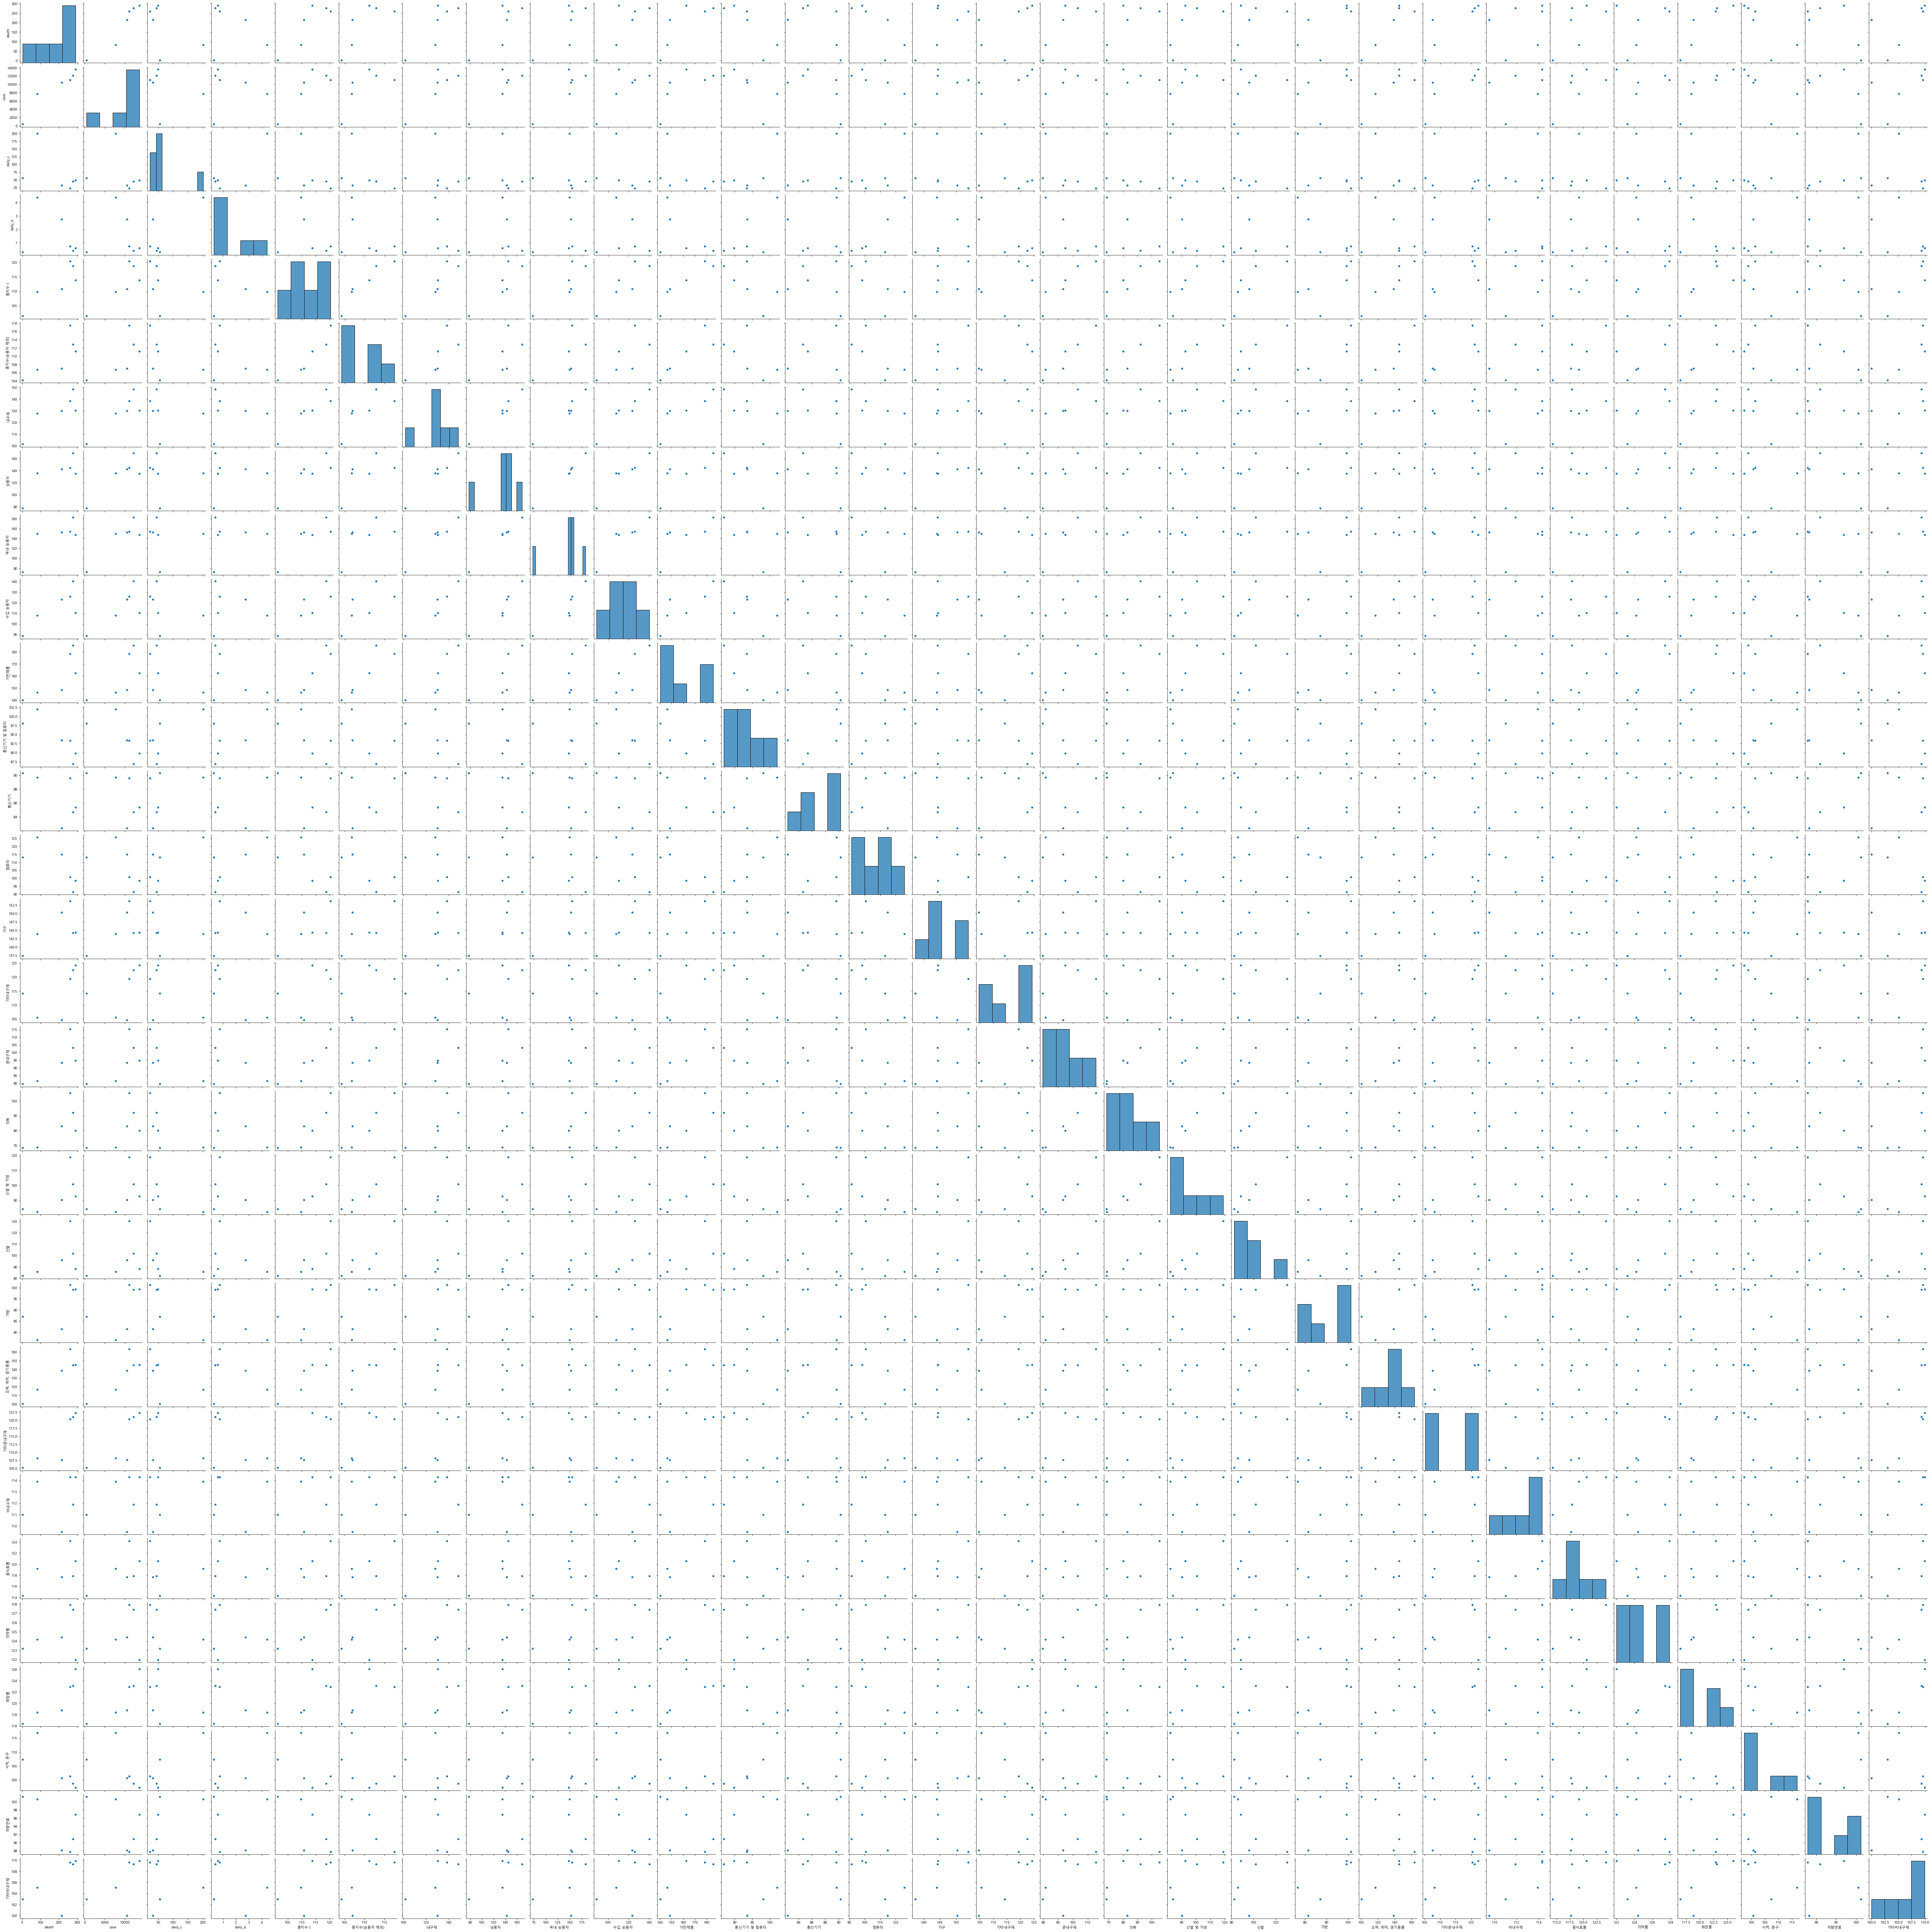

In [33]:
n_price2 = sns.pairplot(pp_data2)

In [34]:
plt.show()

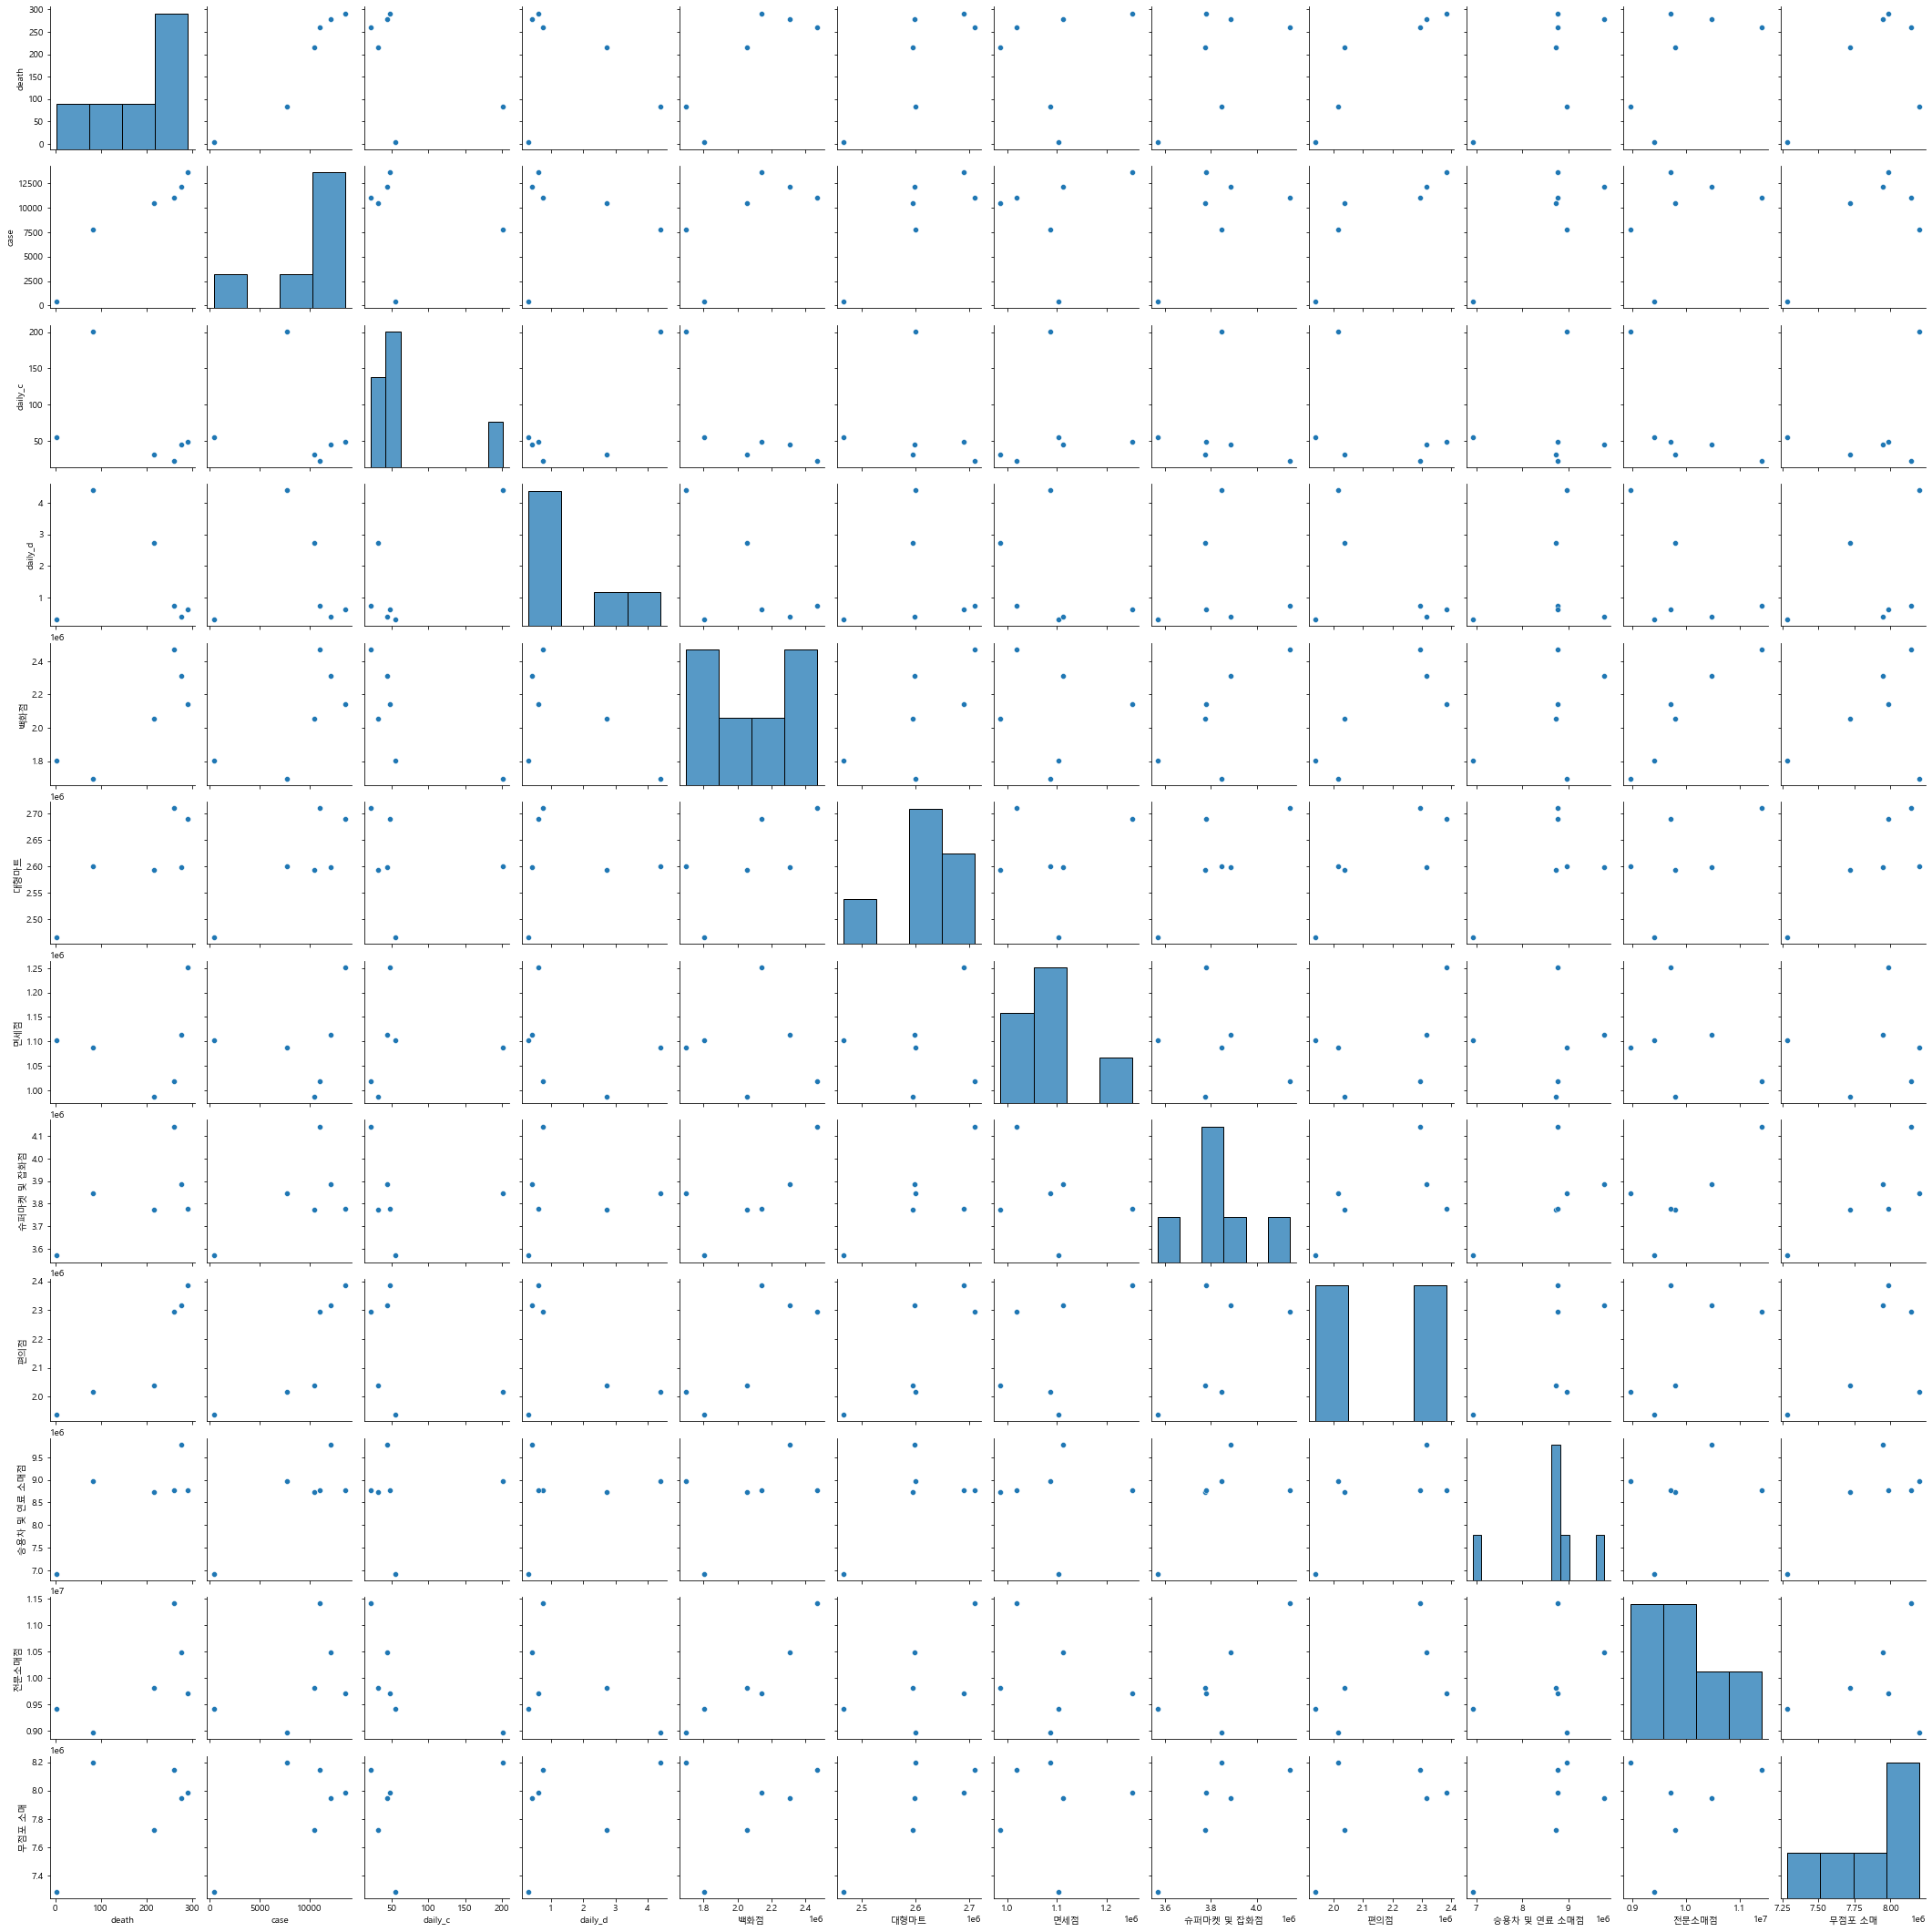

In [37]:
price3 = pd.read_excel("소매업태별판매액1.xlsx")
pd.to_datetime(price3["period"])
pp_data3 = pd.concat([m_corona, price3], axis = 1)
n_price3 = sns.pairplot(pp_data3)
plt.show()

In [57]:
m_fi = pd.read_excel("m_kfi.xlsx")

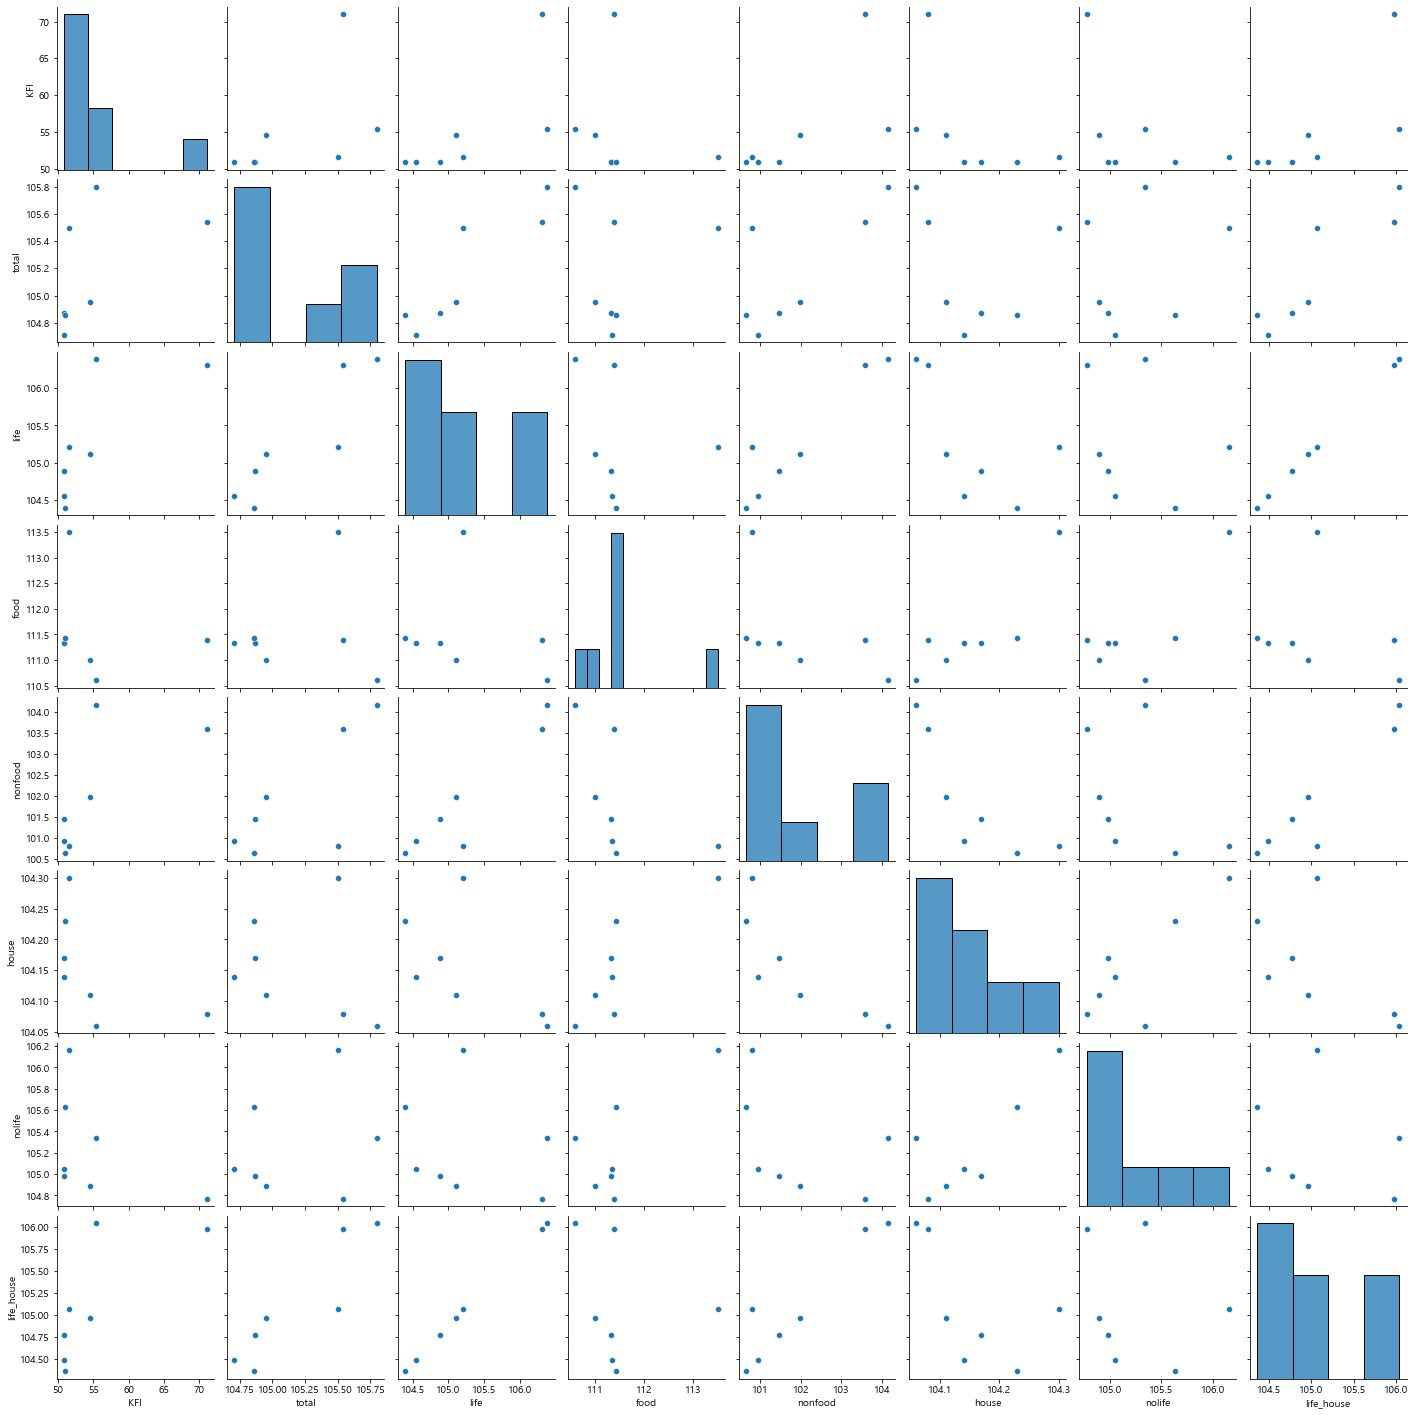

In [59]:
pp_data4 = pd.concat([m_fi["KFI"], price1], axis = 1)
f_price1 = sns.pairplot(pp_data4)
plt.show()

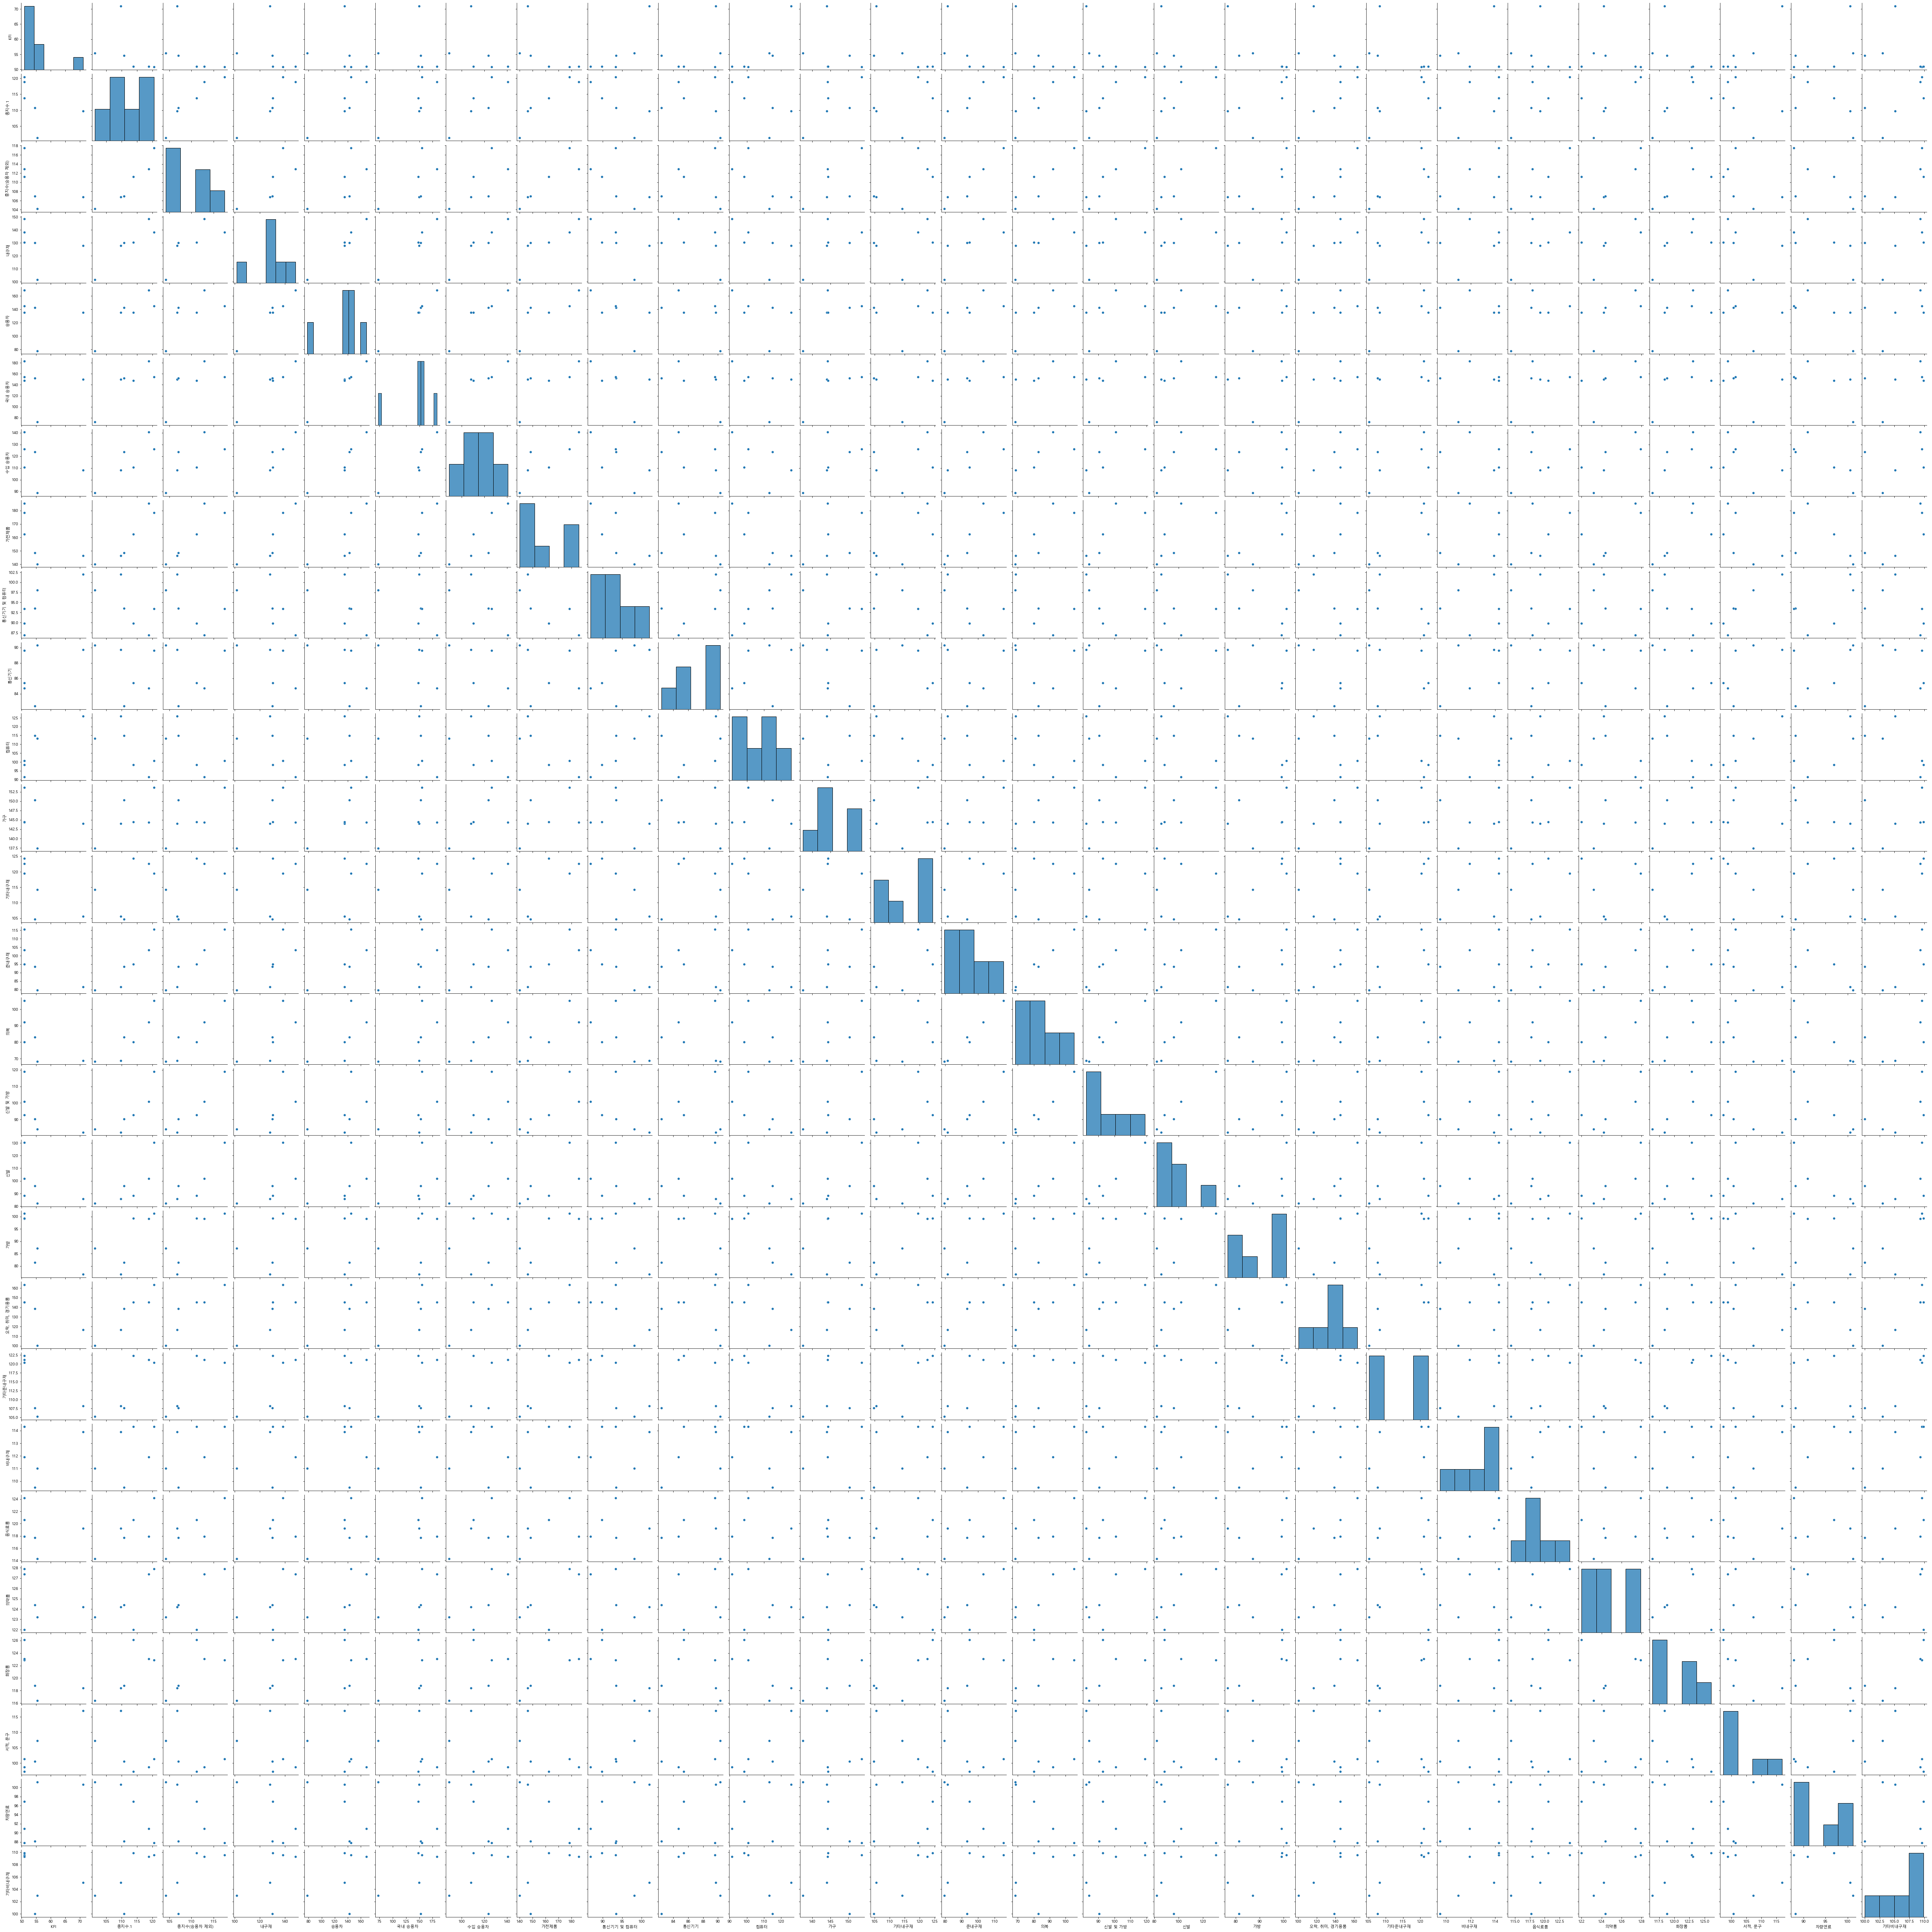

In [61]:
pp_data5 = pd.concat([m_fi["KFI"],price2], axis = 1)
f_price2 = sns.pairplot(pp_data5)
plt.show()

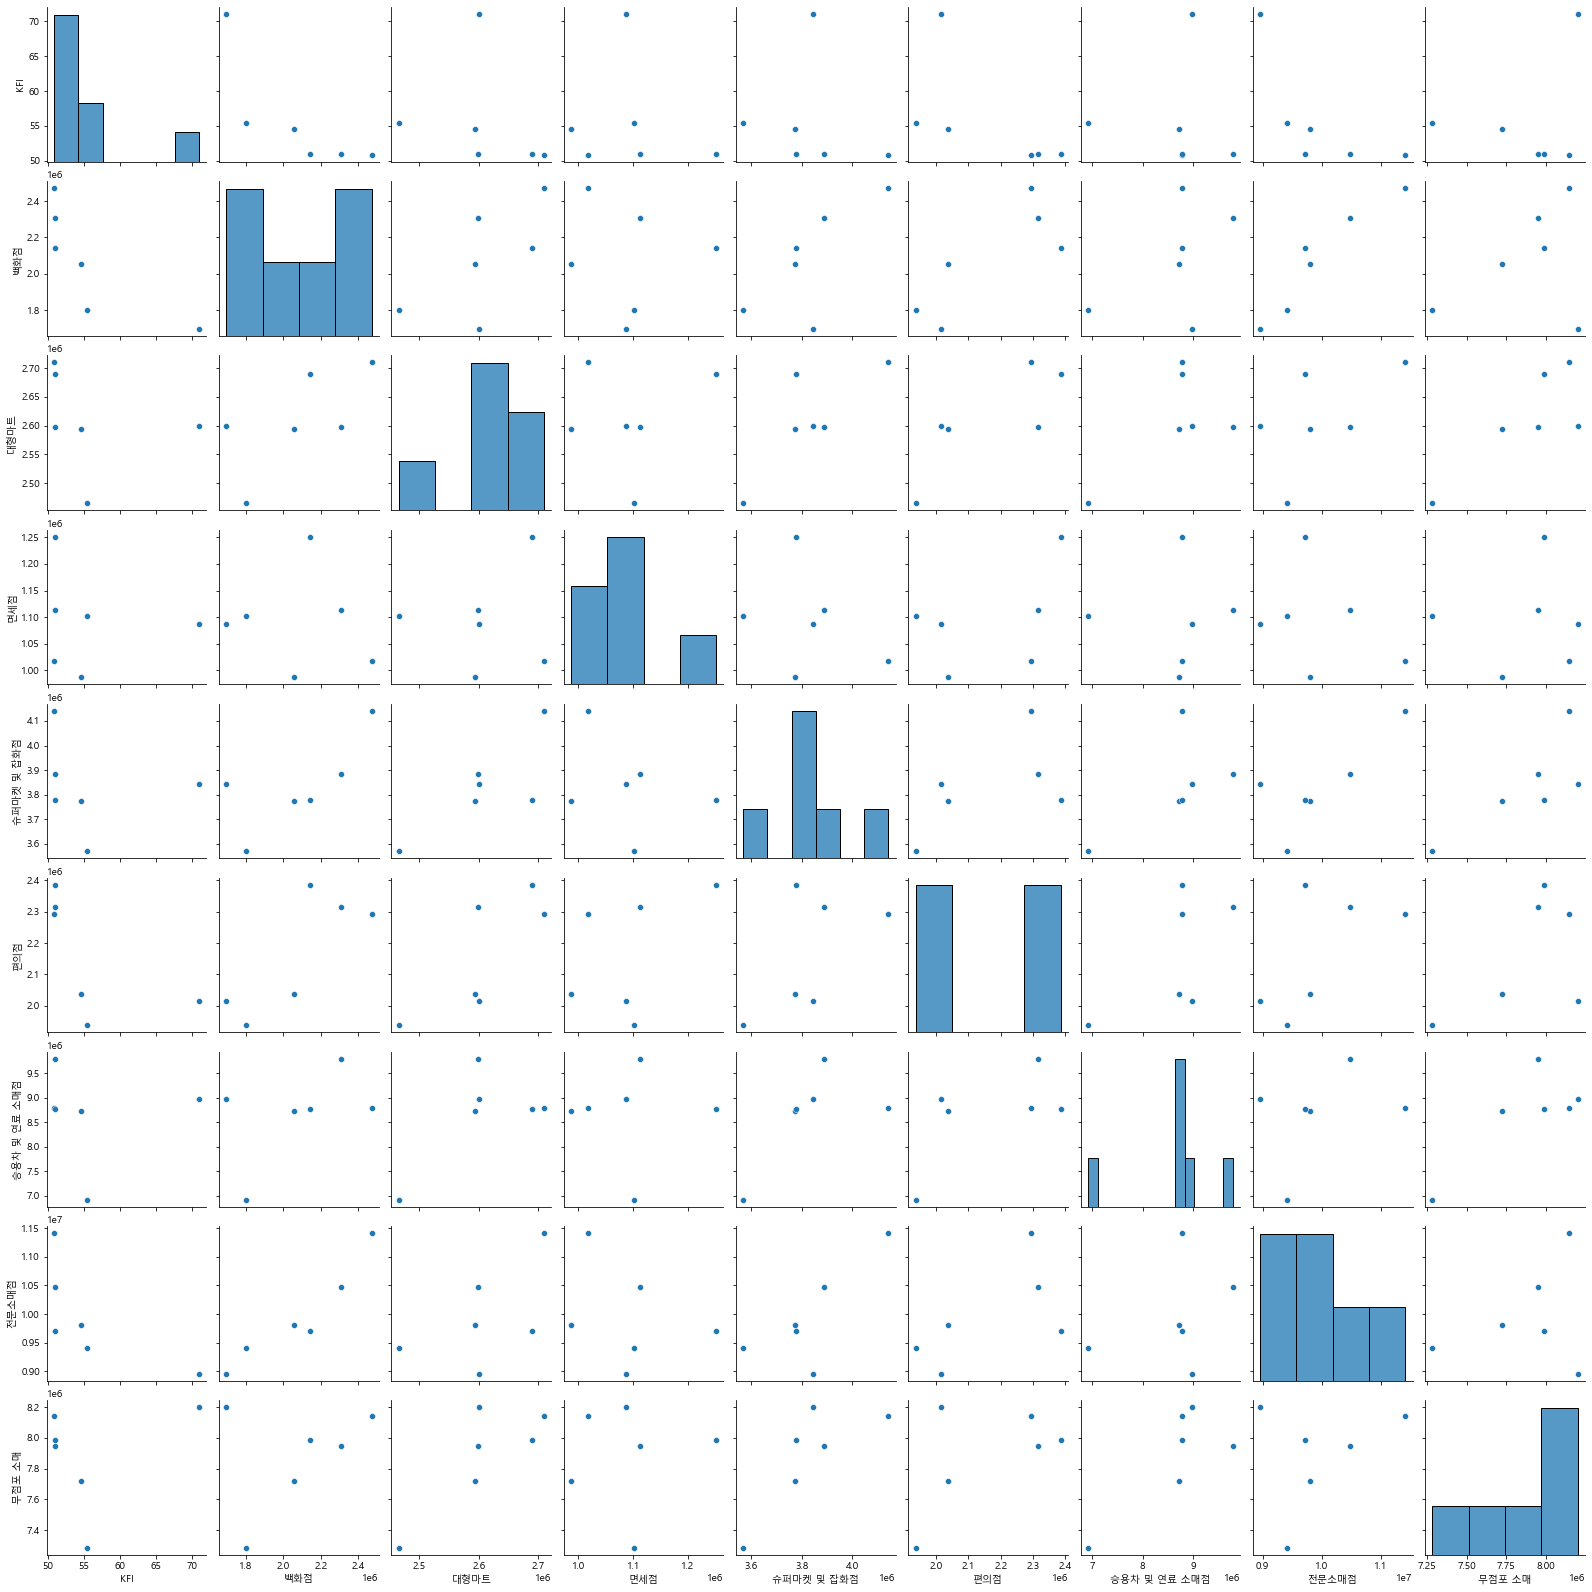

In [62]:
pp_data6 = pd.concat([m_fi["KFI"], price3], axis = 1)
f_price3 = sns.pairplot(pp_data6)
plt.show()